In [36]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet

In [37]:
forest_cause = pd.read_csv('/Users/manele/Downloads/DF_Forest_Fire.csv')

In [38]:
forest_cause

,ID,Type,Date,Code_Departement,Commune,Area (ha),Cause
0,1334,Forêt,2020-03-31,26,CURNIER,1.00,Accidentelle
1,5164,Forêt,2020-04-02,13,FARE-LES-OLIVIERS (LA),0.10,Vehicules
2,5163,Forêt,2020-04-02,13,SAINT-CANNAT,0.12,Travaux (Particuliers)
3,1335,Forêt,2020-04-03,26,GRIGNAN,0.30,Malveillance
4,1336,Forêt,2020-04-04,26,VINSOBRES,1.53,Travaux Agricoles
...,...,...,...,...,...,...,...
2421,5834,Forêt,2022-08-30,83,BAGNOLS-EN-FORÊT,0.02,Foudre
2422,6219,Forêt,2022-09-01,7,BEAULIEU,8.00,Foudre
2423,6115,Forêt,2022-09-01,13,FUVEAU,0.05,Malveillance
2424,6220,Forêt,2022-09-01,7,MONTPEZAT-SOUS-BAUZON,0.02,Reprise Incendie


In [39]:
forest_cause['ID_new']= forest_cause.index

In [40]:
forest_cause=forest_cause.drop(columns=['ID'])

In [41]:
forest_cause['ID_new']

0          0
1          1
2          2
3          3
4          4
        ... 
2421    2421
2422    2422
2423    2423
2424    2424
2425    2425
Name: ID_new, Length: 2426, dtype: int64

In [42]:
forest_cause.set_index(forest_cause['Date'], inplace=True)

<AxesSubplot:xlabel='Date'>

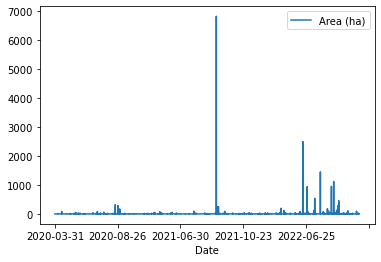

In [43]:
forest_cause[["Area (ha)"]].plot()

In [44]:
forecast_data = forest_cause[["Date","Area (ha)"]]

In [45]:
forecast_data.columns=["ds","y"]

In [46]:
forecast_data.dtypes

ds     object
y     float64
dtype: object

In [47]:
forecast_data['ds']= pd.to_datetime(forecast_data['ds'])

/var/folders/bf/6bkz0r_n2gv741cyht30r3900000gn/T/ipykernel_5674/134088404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
forecast_data

,ds,y
Date,,
2020-03-31,2020-03-31,1.00
2020-04-02,2020-04-02,0.10
2020-04-02,2020-04-02,0.12
2020-04-03,2020-04-03,0.30
2020-04-04,2020-04-04,1.53
...,...,...
2022-08-30,2022-08-30,0.02
2022-09-01,2022-09-01,8.00
2022-09-01,2022-09-01,0.05


In [49]:
#I create a new prophet object, then I fit my prepared data into it

In [50]:
m = Prophet()
m.fit(forecast_data)

22:01:39 - cmdstanpy - INFO - Chain [1] start processing
22:01:39 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
#I choose the forecast I want, in this case I choose a forecast for the next two years

In [52]:
future = m.make_future_dataframe(periods=600)
future

,ds
0,2020-03-31
1,2020-04-02
2,2020-04-03
3,2020-04-04
4,2020-04-05
...,...
1214,2024-04-19
1215,2024-04-20
1216,2024-04-21
1217,2024-04-22


In [53]:
#I obtain a dataframe with a yhat as the prediction, the rest as the confidence interval

In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-31,-4.905105,-204.518159,188.230134
1,2020-04-02,-4.009010,-200.017475,189.057798
2,2020-04-03,-9.257272,-212.754114,190.406282
3,2020-04-04,-3.629047,-220.419587,187.850568
4,2020-04-05,-10.331512,-204.932866,189.575273
...,...,...,...,...
1214,2024-04-19,1.160177,-184.275144,197.841094
1215,2024-04-20,7.299112,-203.074088,221.825729
1216,2024-04-21,1.305725,-200.607970,210.950452
1217,2024-04-22,22.014461,-190.963265,231.230793


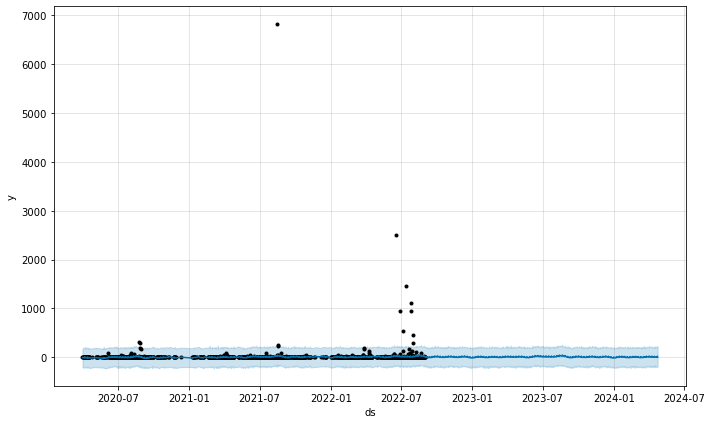

In [55]:
fig1 = m.plot(forecast)

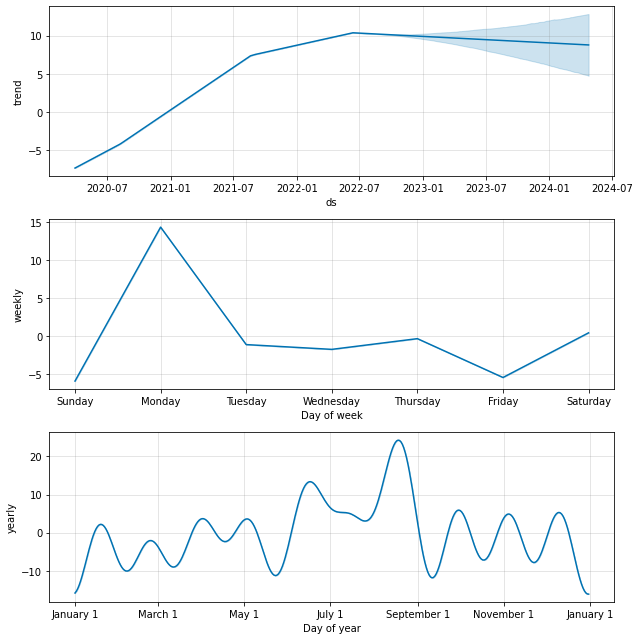

In [56]:
fig = m.plot_components(forecast)

In [57]:
#The spread thing is the confidence interval

In [59]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_components_plotly(m, forecast)
